In [2]:
import pandas as pd
import pickle
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [31]:
with open("results/avgrestime_raw2.pickle", "rb") as f:
    results = pickle.load(f)

processed_results = {}
for day in ["we", "wd"]:
    processed_results[day] = {}
    for time in ["early", "morning", "midday", "evening", "night"]:
        processed_results[day][time] = {}

for case in results:
    for num_depot, data in case.items():
        day, time = data["day"], data["time"]

        processed_results[day][time][num_depot] = data

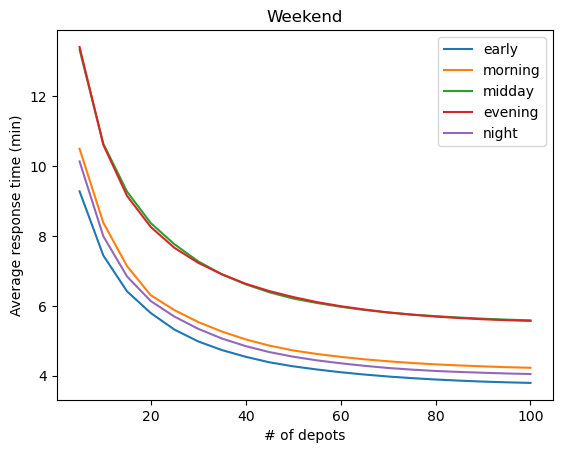

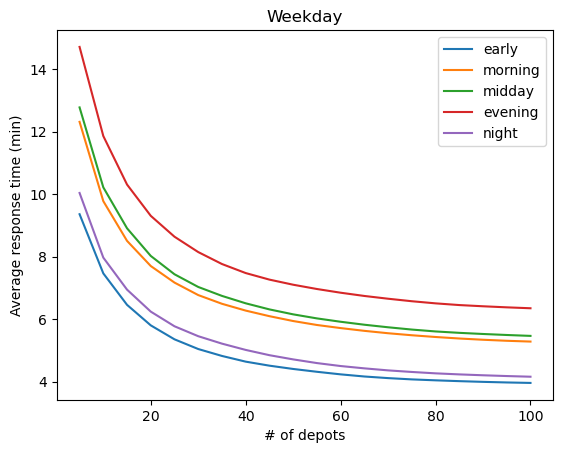

In [32]:
for day in ["we", "wd"]:
    for time in ["early", "morning", "midday", "evening", "night"]:
        objs = []
        scenario = processed_results[day][time]
        for num_depot, data in scenario.items():
            obj = data["objective"]
            objs.append(obj)
        plt.plot(processed_results[day][time].keys(), np.array(objs) / 60, label=f"{time}")
    plt.xlabel("# of depots")
    plt.ylabel("Average response time (min)")
    plt.title(f"Weekend") if day == "we" else plt.title(f"Weekday")
    plt.legend()
    plt.show()

In [15]:
with open("results/min_avgrestime2_raw.pickle", "rb") as f:
    results = pickle.load(f)

processed_results = {}
for day in ["we", "wd"]:
    processed_results[day] = {}
    for time in ["early", "morning", "midday", "evening", "night"]:
        processed_results[day][time] = {}

for day in ["we", "wd"]:
    for time in ["early", "morning", "midday", "evening", "night"]:
        day_time_results = results[day][time]
        for num_depot, data in day_time_results.items():
            processed_results[day][time][num_depot] = data

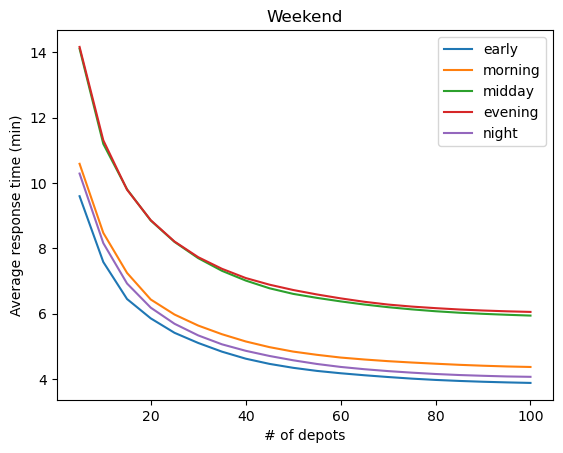

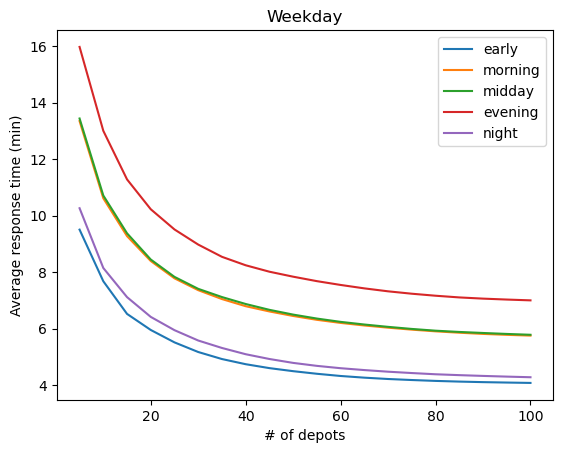

In [17]:
for day in ["we", "wd"]:
    for time in ["early", "morning", "midday", "evening", "night"]:
        objs = []
        scenario = processed_results[day][time]
        for num_depot, data in scenario.items():
            obj = data["objective"]
            objs.append(obj)
        plt.plot(processed_results[day][time].keys(), np.array(objs) / 60, label=f"{time}")
    plt.xlabel("# of depots")
    plt.ylabel("Average response time (min)")
    plt.title(f"Weekend") if day == "we" else plt.title(f"Weekday")
    plt.legend()
    plt.show()

In [19]:
with open("results/min_worstrestime_raw2.pickle", "rb") as f:
    results = pickle.load(f)

processed_results = {}
for day in ["we", "wd"]:
    processed_results[day] = {}
    for time in ["early", "morning", "midday", "evening", "night"]:
        processed_results[day][time] = {}

for day in ["we", "wd"]:
    for time in ["early", "morning", "midday", "evening", "night"]:
        day_time_results = results[day][time]
        for num_depot, data in day_time_results.items():
            processed_results[day][time][num_depot] = data

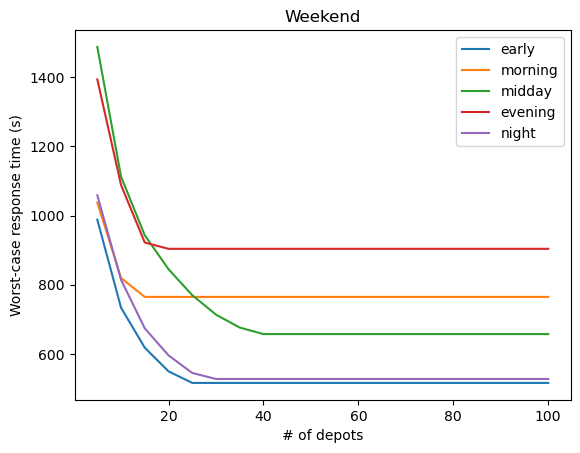

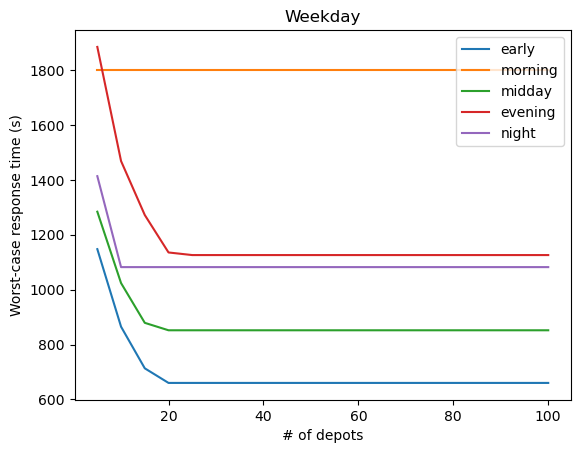

In [20]:
for day in ["we", "wd"]:
    for time in ["early", "morning", "midday", "evening", "night"]:
        objs = []
        scenario = processed_results[day][time]
        for num_depot, data in scenario.items():
            obj = data["objective"]
            objs.append(obj)
        plt.plot(processed_results[day][time].keys(), np.array(objs), label=f"{time}")
    plt.xlabel("# of depots")
    plt.ylabel("Worst-case response time (s)")
    plt.title(f"Weekend") if day == "we" else plt.title(f"Weekday")
    plt.legend()
    plt.show()

In [53]:
day = "we"
time = "morning"

In [59]:
import osmnx as ox
import networkx as nx

In [57]:
print(f"Loading accident and congestion data for {day}, {time}")
A_traffics = np.load(f"processed_data/accident_tables/A_traffics_{day}_{time}.npy")
accident_df = pd.read_csv(f"processed_data/accident_tables/{day}_{time}_accidents.csv")
congestion_df = pd.read_csv(f"processed_data/congestion_tables/{day}_{time}_congestion.csv")

print(f"Processing data")

accident_df["date"] = pd.to_datetime(accident_df["date"])
congestion_df["date"] = pd.to_datetime(congestion_df["date"])

accident_df_filtered = accident_df[accident_df["date"].dt.year < 2023].drop("date", axis=1)
congestion_df_filtered = congestion_df[congestion_df["date"].dt.year < 2023].drop("date", axis=1)

to_drop = (
    accident_df_filtered.isna().any(axis=1)
    | congestion_df_filtered.isna().any(axis=1)
    | (accident_df_filtered == 0).all(axis=1)
)

accident_df_filtered = accident_df_filtered[~to_drop]
congestion_df_filtered = congestion_df_filtered[~to_drop]

# process accidents
accident_counts = (accident_df_filtered.to_numpy()).sum(axis=0)
accident_freqs = accident_counts / accident_counts.sum()
# process congestion
congestion_factors = congestion_df_filtered.mean(axis=0)
with open("processed_data/bkk_augmented_graph.pickle", "rb") as f:
    G = pickle.load(f)

G = ox.add_edge_speeds(G)

# impute travel time for each scenario
for idx, edge in enumerate(G.edges):
    G[edge[0]][edge[1]][edge[2]]["speed_kph"] *= 1 - congestion_factors[idx]

G = ox.routing.add_edge_travel_times(G)

Loading accident and congestion data for we, morning
Processing data


/var/folders/7_/y4vpj6ln7b90djzq_hscbgyr0000gn/T/ipykernel_7994/329999599.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G[edge[0]][edge[1]][edge[2]]["speed_kph"] *= 1 - congestion_factors[idx]


In [2]:
import pickle

In [6]:
with open('depots/gas_stations.pickle', 'rb') as f:
    gas_stations = pickle.load(f)

In [8]:
len(gas_stations)

82